Episode 100: Reward = -200, Epsilon = 0.366
Episode 200: Reward = -200, Epsilon = 0.134
Episode 300: Reward = -200, Epsilon = 0.049
Episode 400: Reward = -200, Epsilon = 0.018
Episode 500: Reward = -200, Epsilon = 0.010
Episode 600: Reward = -200, Epsilon = 0.010
Episode 700: Reward = -200, Epsilon = 0.010
Episode 800: Reward = -200, Epsilon = 0.010
Episode 900: Reward = -200, Epsilon = 0.010
Episode 1000: Reward = -200, Epsilon = 0.010
Episode 1100: Reward = -200, Epsilon = 0.010
Episode 1200: Reward = -200, Epsilon = 0.010
Episode 1300: Reward = -200, Epsilon = 0.010
Episode 1400: Reward = -200, Epsilon = 0.010
Episode 1500: Reward = -200, Epsilon = 0.010
Episode 1600: Reward = -200, Epsilon = 0.010
Episode 1700: Reward = -200, Epsilon = 0.010
Episode 1800: Reward = -200, Epsilon = 0.010
Episode 1900: Reward = -200, Epsilon = 0.010
Episode 2000: Reward = -200, Epsilon = 0.010


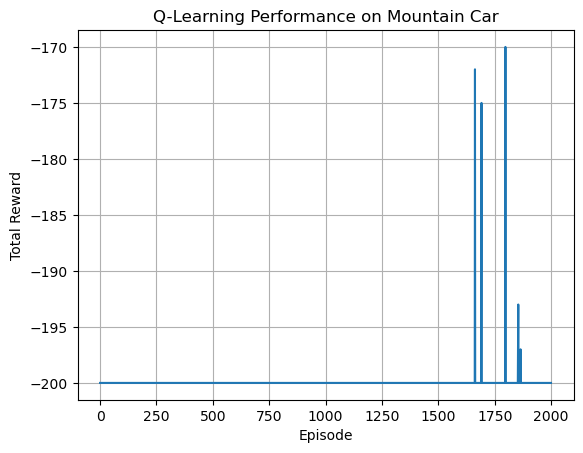

Final position: -0.8948
Test Episode Reward: -200


In [14]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
import random

seed = int(time.time()) % 2**32
np.random.seed(seed)
random.seed(seed)

# Create environment
env = gym.make("MountainCar-v0")

# Discretize state space
position_bins = np.linspace(-1.2, 0.6, 40)
velocity_bins = np.linspace(-0.07, 0.07, 40)

def discretize_state(state):
    pos, vel = state
    pos_idx = np.digitize(pos, position_bins) - 1
    vel_idx = np.digitize(vel, velocity_bins) - 1
    return (pos_idx, vel_idx)

# Q-table initialization
n_pos = len(position_bins)
n_vel = len(velocity_bins)
n_actions = env.action_space.n
Q = np.zeros((n_pos, n_vel, n_actions))

# Hyperparameters
alpha = 0.1          # learning rate
gamma = 0.99         # discount factor
epsilon = 1.0        # exploration rate
epsilon_decay = 0.99
epsilon_min = 0.01
num_episodes = 2000
max_steps = 200

episode_rewards = []

for episode in range(num_episodes):
    state, _ = env.reset()
    state_disc = discretize_state(state)
    total_reward = 0

    for step in range(max_steps):
        # ε-greedy policy
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state_disc])

        next_state, _, terminated, truncated, _ = env.step(action)

        # Custom reward: 0 if flag reached, -1 otherwise
        reward = 0 if next_state[0] >= 0.5 else -1

        next_state_disc = discretize_state(next_state)
        best_future_q = np.max(Q[next_state_disc])

        # Q-learning update
        Q[state_disc][action] += alpha * (reward + gamma * best_future_q - Q[state_disc][action])

        state_disc = next_state_disc
        total_reward += reward

        if terminated or truncated:
            break

    episode_rewards.append(total_reward)
    epsilon = max(epsilon * epsilon_decay, epsilon_min)

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}: Reward = {total_reward}, Epsilon = {epsilon:.3f}")

env.close()

# Plotting reward curve
plt.plot(episode_rewards)
plt.title("Q-Learning Performance on Mountain Car")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()

# --- TEST RUN WITH RENDERING ---
env = gym.make("MountainCar-v0", render_mode="human")
state, _ = env.reset()
state_disc = discretize_state(state)
total_reward = 0

for step in range(max_steps):
    action = np.argmax(Q[state_disc])
    next_state, _, terminated, truncated, _ = env.step(action)

    reward = 0 if next_state[0] >= 0.5 else -1
    total_reward += reward

    state_disc = discretize_state(next_state)
    time.sleep(0.02)

    if terminated or truncated:
        break

env.close()
print(f"Final position: {next_state[0]:.4f}")
print(f"Test Episode Reward: {total_reward}")